### Initial exploratory analysis of the olist_order_payments_dataset.csv table set

In [1]:
# Import libraries here
# Tool that allows us to import, better manage the data set
import pandas as pd
# Tool that helps us in the mathematical handling of data
import numpy as np
# Library that helps us in data visualization
import matplotlib.pyplot as plt
# Data visualization tool
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,8.27)})

In [2]:
# Import data here
df = pd.read_csv("../../data/raw/olist_order_payments_dataset.csv")

In [3]:
# The method is used to display the first rows of the dataframe
df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [4]:
# At this point we visualize the data of the last rows of the dataframe
df.tail()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


In [5]:
# Check the number of rows and columns of the dataframe
print(df.shape)

(103886, 5)


In [6]:
# We extend information of my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [7]:
df.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

- It can be seen that the data set has 5 columns of which 2 columns are of the object type or of the categorical type, which are 'order_id' which refers to the id of the order and 'payment_type' which refers to the types of payment by the nature of being the type of payment is close to being a categorical type.
- Regarding other data, we have two columns of the integer type 'payment_sequential' and 'payment_installments' which refer to a number of installments for which it is logical that it be an integer.
- In the last place we have the column that refers to 'payment_value' to the value of the payment and it is logical because the values do not necessarily have to be integers, for this reason it adapts to the description of the column.

In [8]:
df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


- Regarding the 'payment_sequential' column, it can be said that its minimum value is 1 and the maximum value is 29 with an average of 1.09.
- Now, if we analyze the 'payment_installments' column, we can see that its minimum value is 0 and the maximum value is 24, which reflects the number of installments and is logical regarding purchases, the options they offer us, having an average of 2.85 .
- Lastly, the 'payment_value' column shows that the minimum value is 0 and the maximum value is 13664.08 with an average of 154.10.

To broaden the panorama of information, we will also include the categorical data and take advantage of the describe(include='all') function, in order to have a greater amount of preliminary information on the data set.

In [9]:
df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


- Regarding the 'order_id' column, it can be seen that out of 103886 tuples we have 99440 unique values where the value with the highest frequency does so 29 times.
- Taking into account the 'payment_type' column, we observe that there are 5 unique values, that is, five payment methods, of which the 'credit_card' option is the most frequently used with a frequency of 76795 within our data set.

We will proceed to evaluate if within our data set we have null data or NaN and thus be able to know where.

In [10]:
df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

With regard to having null data, it tells us that we do not have null data in our data set.

In [11]:
df['order_id'].value_counts()

fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
6d2a30c9b7dcee3ed507dc9a601f99e7     1
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
28bbae6599b09d39ca406b747b6632b1     1
Name: order_id, Length: 99440, dtype: int64

In [12]:
df.groupby('order_id').count()

,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,1,1
00018f77f2f0320c557190d7a144bdd3,1,1,1,1
000229ec398224ef6ca0657da4fc703e,1,1,1,1
00024acbcdf0a6daa1e931b038114c75,1,1,1,1
00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,1
...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,1,1,1
fffcd46ef2263f404302a634eb57f7eb,1,1,1,1
fffce4705a9662cd70adb13d4a31832d,1,1,1,1


- The values that are repeated the most in the 'order_id' column do so 29 times, the one that follows 26, 22, 21, 19 until reaching the unique values.

In [13]:
df['payment_sequential'].value_counts()

1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
18        6
19        6
16        6
17        6
21        4
20        4
22        3
26        2
24        2
23        2
25        2
29        1
28        1
27        1
Name: payment_sequential, dtype: int64

In [14]:
df['payment_sequential'].value_counts().sum()

103886

In [15]:
df.groupby('payment_sequential').count()

,order_id,payment_type,payment_installments,payment_value
payment_sequential,,,,
1,99360,99360,99360,99360
2,3039,3039,3039,3039
3,581,581,581,581
4,278,278,278,278
5,170,170,170,170
6,118,118,118,118
7,82,82,82,82
8,54,54,54,54
9,43,43,43,43


<AxesSubplot:xlabel='count', ylabel='payment_sequential'>

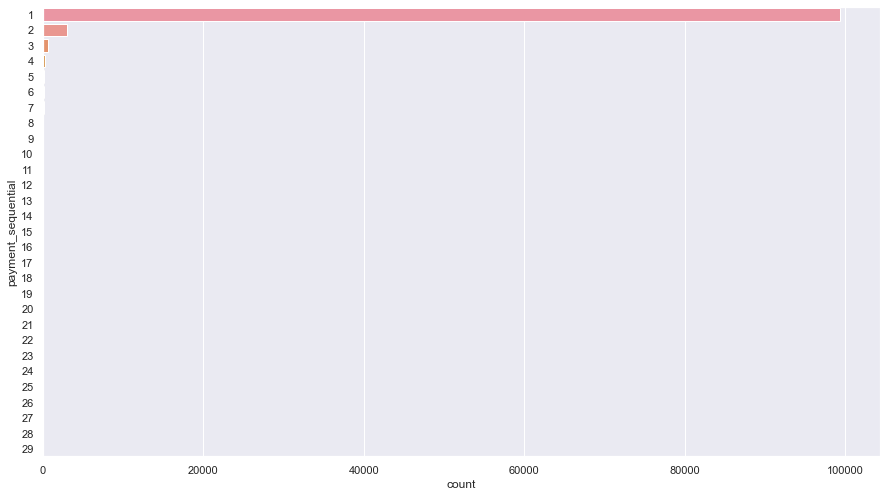

In [16]:
sns.countplot(y='payment_sequential', data=df)

- Within the 'payment_sequential' column, 29 types are observed, of which 1 has the largest quantity in a significant way and progressively decreases until 27, 28 and 29 only have a single occurrence within the data set.

In [17]:
df['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [18]:
df.groupby('payment_type').count()

,order_id,payment_sequential,payment_installments,payment_value
payment_type,,,,
boleto,19784,19784,19784,19784
credit_card,76795,76795,76795,76795
debit_card,1529,1529,1529,1529
not_defined,3,3,3,3
voucher,5775,5775,5775,5775


<AxesSubplot:xlabel='count', ylabel='payment_type'>

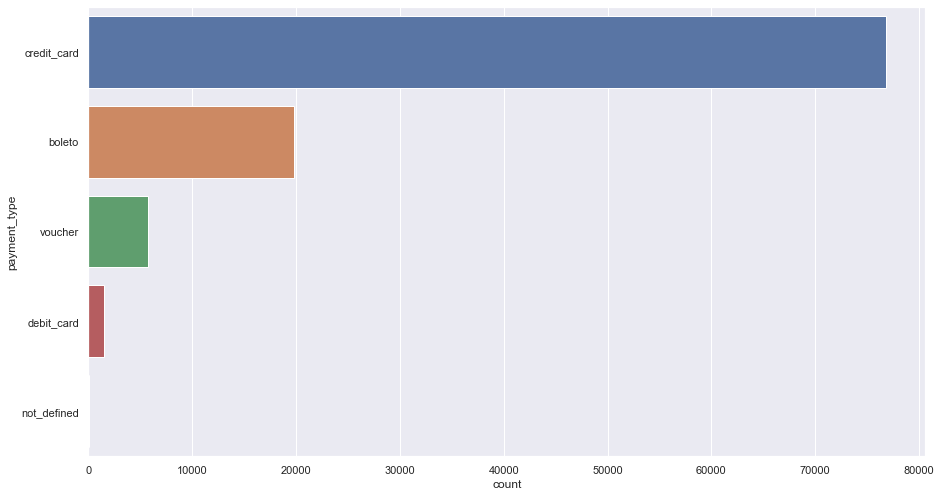

In [19]:
sns.countplot(y='payment_type', data=df)

- Within the 'payment_type' column, it can be seen that there are 5 types of payments where 'credit_card' prevails first, followed by 'boleto', voucher, 'debit_card' and 'not_defined', of which the latter are not defined with respect to the set they are 3 which is a low number compared to the other categories.

In [20]:
df['payment_installments'].value_counts()

1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: payment_installments, dtype: int64

In [21]:
df['payment_installments'].value_counts().sum()

103886

In [22]:
df.groupby('payment_installments').count()

,order_id,payment_sequential,payment_type,payment_value
payment_installments,,,,
0,2,2,2,2
1,52546,52546,52546,52546
2,12413,12413,12413,12413
3,10461,10461,10461,10461
4,7098,7098,7098,7098
5,5239,5239,5239,5239
6,3920,3920,3920,3920
7,1626,1626,1626,1626
8,4268,4268,4268,4268


<AxesSubplot:xlabel='count', ylabel='payment_installments'>

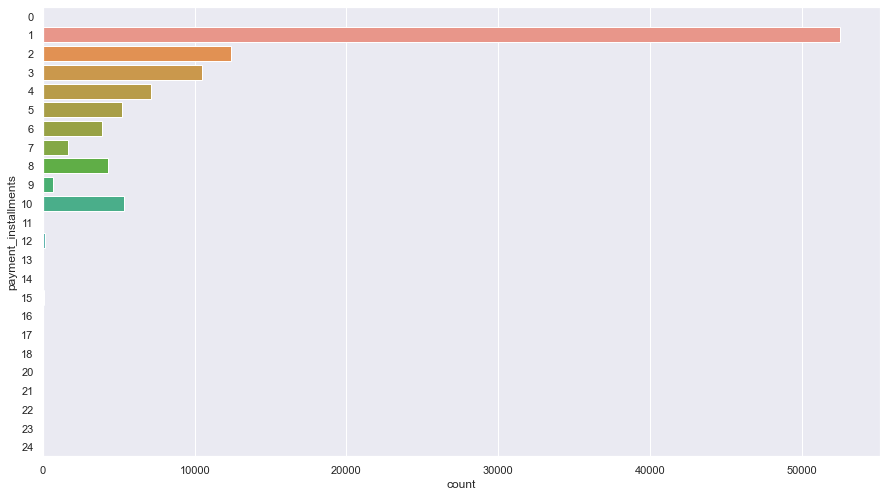

In [23]:
sns.countplot(y='payment_installments', data=df)

- It is observed in the 'payment_installments' column that there are up to 24 installments of which the data set reflects, as a characteristic we can observe that from 0 installments to 24 but we do not have any value with 19 installments, it should be noted that the 3 highest values of frequency references 1, 2, and 3 coutas respectively.

In [24]:
df['payment_value'].value_counts()

50.00      324
20.00      274
100.00     255
77.57      250
35.00      165
          ... 
264.64       1
1071.83      1
563.95       1
38.07        1
363.31       1
Name: payment_value, Length: 29077, dtype: int64

In [25]:
df.groupby('payment_value').count()

,order_id,payment_sequential,payment_type,payment_installments
payment_value,,,,
0.00,9,9,9,9
0.01,6,6,6,6
0.03,2,2,2,2
0.05,2,2,2,2
0.07,1,1,1,1
...,...,...,...,...
6726.66,1,1,1,1
6922.21,1,1,1,1
6929.31,1,1,1,1


- In this last column of 'payment_value' it is observed that the one with the highest frequency is the value of 50 with 324 tuples that have this value, the number of frequency is lowered with the value of 20 with 274 times, 100 with 255 times what we It shows a reflection of different payment values, some with various frequencies and others with a single value.